In [2]:
import pandas as pd
import matplotlib.pyplot as plt

stat = pd.read_csv('cost_of_living_2020.csv')


In [3]:
stat.shape

(135, 10)

In [4]:
stat.head()

,Rank 2020,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,McMeal($),Unnamed: 9
0,1,Bermuda,147.77,85.70,117.54,146.63,152.52,78.17,0.00,NaN
1,2,Switzerland,125.69,51.20,89.41,124.93,118.55,114.83,15.36,NaN
2,3,Norway,96.80,32.61,65.54,89.55,96.81,83.40,12.36,NaN
3,4,Iceland,90.19,38.54,65.04,80.91,97.17,74.78,13.31,NaN
4,5,Japan,86.22,26.18,56.98,86.84,48.07,78.88,6.70,NaN


In [5]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank 2020                       135 non-null    int64  
 1   Country                         135 non-null    object 
 2   Cost of Living Index            135 non-null    float64
 3   Rent Index                      135 non-null    float64
 4   Cost of Living Plus Rent Index  135 non-null    float64
 5   Groceries Index                 135 non-null    float64
 6   Restaurant Price Index          135 non-null    float64
 7   Local Purchasing Power Index    135 non-null    float64
 8   McMeal($)                       135 non-null    float64
 9   Unnamed: 9                      0 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.7+ KB


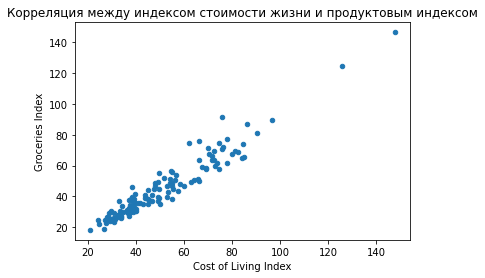

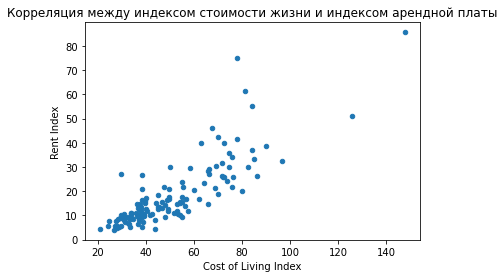

In [6]:
stat.plot(kind='scatter', 
        x='Cost of Living Index', 
        y='Groceries Index', 
        title='Корреляция между индексом стоимости жизни и продуктовым индексом')

stat.plot(kind='scatter', 
        x='Cost of Living Index', 
        y='Rent Index', 
        title='Корреляция между индексом стоимости жизни и индексом арендной платы')
plt.show()

In [ ]:
# стоимость жизни в странах напрямую зависит от стоимости продуктовой корзины (прямая линейная зависимость)

In [12]:
st1 = stat.iloc[:, [1,-2]]
st2 = st1[(st1['McMeal($)'] != 0)]
st2

,Country,McMeal($)
1,Switzerland,15.36
2,Norway,12.36
3,Iceland,13.31
4,Japan,6.70
5,Denmark,12.63
...,...,...
127,Nepal,6.55
128,Tunisia,3.65
129,Uzbekistan,3.00
133,India,4.05


In [15]:
def segment(row):
    if row['McMeal($)'] < 5:
        return '<5$'
    if row['McMeal($)'] < 10:
        return '5-10$'
    else:
        return '>10$'

In [17]:
st2['segment_McMeal'] = st2.apply(segment, axis = 1)
st2

<ipython-input-17-725b6bb158d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st2['segment_McMeal'] = st2.apply(segment, axis = 1)


,Country,McMeal($),segment_McMeal
1,Switzerland,15.36,>10$
2,Norway,12.36,>10$
3,Iceland,13.31,>10$
4,Japan,6.70,5-10$
5,Denmark,12.63,>10$
...,...,...,...
127,Nepal,6.55,5-10$
128,Tunisia,3.65,<5$
129,Uzbekistan,3.00,<5$
133,India,4.05,<5$


<AxesSubplot:title={'center':'Доли стран по диапазонам индекса МакМила'}, ylabel='segment_McMeal'>

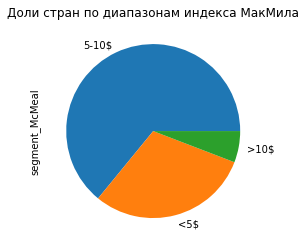

In [42]:
pie_st = st2['segment_McMeal'].value_counts()
pie_st.plot(kind='pie', title='Доли стран по диапазонам индекса МакМила')

In [24]:
# в большинстве стран МакМил стоит в пределах 5-10$

<AxesSubplot:title={'center':'Распределение индексов'}>

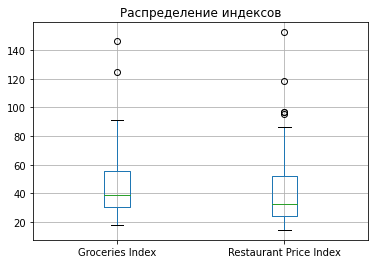

In [26]:
stat[['Groceries Index', 'Restaurant Price Index']].plot(kind='box',
                                        title='Распределение индексов', grid=True)

In [27]:
# выбросы по показателям Groceries Index и Restaurant Price Index не значительны, медианные значение - 40 и 30 соответственно, 
# большинство значений индексов находится в диапазоне 30-55 и 25-50 единиц соответственно

In [31]:
st3 = stat.iloc[:, [1,-3]]
st3

,Country,Local Purchasing Power Index
0,Bermuda,78.17
1,Switzerland,114.83
2,Norway,83.40
3,Iceland,74.78
4,Japan,78.88
...,...,...
130,Syria,9.48
131,Afghanistan,28.19
132,Kyrgyzstan,23.56
133,India,50.55


In [32]:
def segment2(row):
    return int(row['Local Purchasing Power Index'] / 10)

In [34]:
st3['segment_Purchasing_Power'] = st3.apply(segment2, axis = 1)
st3

<ipython-input-34-3fcc0bdca405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st3['segment_Purchasing_Power'] = st3.apply(segment2, axis = 1)


,Country,Local Purchasing Power Index,segment_Purchasing_Power
0,Bermuda,78.17,7
1,Switzerland,114.83,11
2,Norway,83.40,8
3,Iceland,74.78,7
4,Japan,78.88,7
...,...,...,...
130,Syria,9.48,0
131,Afghanistan,28.19,2
132,Kyrgyzstan,23.56,2
133,India,50.55,5


In [37]:
st4 = st3.groupby('segment_Purchasing_Power').agg('count')['Country']
st4

segment_Purchasing_Power
0      3
1     11
2     27
3     28
4     16
5     10
6      8
7     12
8     10
9      6
10     3
11     1
Name: Country, dtype: int64

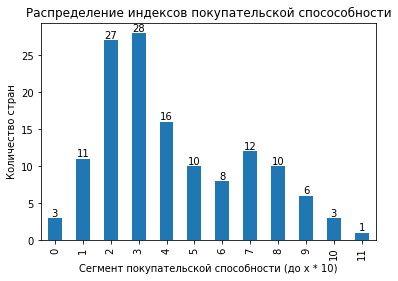

In [39]:
st4.plot(kind='bar', title='Распределение индексов покупательской спосособности',
                             xlabel='Сегмент покупательской способности (до x * 10)',
                             ylabel='Количество стран')
for i, val in enumerate(st4.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

In [43]:
# 27+28 = 55 стран имеют индекс покупательской способности 2-3 
# что в соответствии с сегментацией соответствует значению от 20 до 40